In [1]:
# Import dependencies
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress

# Import dependency and set theme for visualizations
import seaborn as sns
color_theme = sns.set_palette("muted")
sns.set(rc={'axes.facecolor': 'gainsboro', 'figure.facecolor':'whitesmoke'})

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Store file path
csv_path="Output/Border_Crossing_Final_Data.csv"

# Read the csv file
population_df = pd.read_csv(csv_path).drop(columns="Index")

# Display the dataset
population_df

,Year,Month,Timestamp,Border,Port Name,State,Measure,Value,Longitude,Latitude
0,2018,12,1543622400,US-Canada Border,Van Buren,Maine,Trucks,1204,-67.94271,47.16207
1,2018,12,1543622400,US-Canada Border,Maida,North Dakota,Trucks,170,-98.36953,48.98568
2,2018,12,1543622400,US-Mexico Border,Douglas,Arizona,Buses,210,-109.54472,31.34444
3,2018,12,1543622400,US-Mexico Border,Presidio,Texas,Bus Passengers,238,-104.37167,29.56056
4,2018,12,1543622400,US-Canada Border,Anacortes,Washington,Personal Vehicle Passengers,5350,-122.61739,48.49988
...,...,...,...,...,...,...,...,...,...,...
144600,2009,1,1230768000,US-Canada Border,Sherwood,North Dakota,Train Passengers,0,-101.63000,49.00000
144601,2009,1,1230768000,US-Mexico Border,Progreso,Texas,Buses,7,-97.95000,26.06000
144602,2009,1,1230768000,US-Canada Border,Friday Harbor,Washington,Truck Containers Full,0,-123.01000,48.54000
144603,2009,1,1230768000,US-Canada Border,Port Huron,Michigan,Pedestrians,0,-82.42000,43.00000


In [3]:
# generating one row 
sample_df = population_df.sample(frac =.10)
  
# checking if sample is 0.25 times data or not
  
if (0.10*(len(population_df))== len(sample_df)):
    print( "Cool")
    print(len(population_df), len(sample_df))
  
# display
sample_df

,Year,Month,Timestamp,Border,Port Name,State,Measure,Value,Longitude,Latitude
87585,2012,7,1341100800,US-Canada Border,Metaline Falls,Washington,Trucks,259,-117.30,49.00
92478,2012,4,1333238400,US-Mexico Border,Eagle Pass,Texas,Trains,212,-100.51,28.71
136979,2009,6,1243814400,US-Canada Border,Turner,Montana,Trains,0,-108.39,49.00
73812,2013,6,1370044800,US-Canada Border,Van Buren,Maine,Trains,11,-67.93,47.16
54139,2014,9,1409529600,US-Canada Border,Sweetgrass,Montana,Personal Vehicle Passengers,35194,-111.96,49.00
...,...,...,...,...,...,...,...,...,...,...
40760,2015,7,1435708800,US-Canada Border,Vanceboro,Maine,Truck Containers Full,63,-67.43,45.57
87325,2012,7,1341100800,US-Canada Border,Fortuna,North Dakota,Truck Containers Full,20,-103.81,49.00
83555,2012,10,1349049600,US-Canada Border,Dunseith,North Dakota,Truck Containers Full,1957,-100.05,49.00
21682,2016,10,1475280000,US-Mexico Border,Calexico East,California,Trucks,28634,-115.39,32.67


In [13]:

population = population_df[["Year", "Value"]]
sample = sample_df[["Year", "Value"]]

In [14]:
population = population.groupby("Year").mean()
sample = sample.groupby("Year").mean()

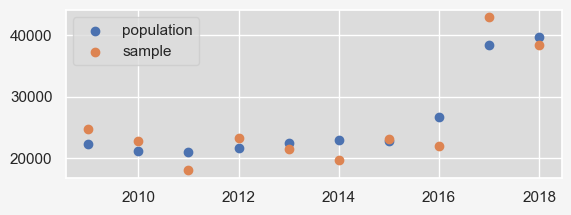

In [15]:
# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(population.index, population, label="population")
plt.scatter(sample.index, sample, label="sample")
plt.legend()

# # Histogram Plot of Data
# plt.subplot(2, 1, 2)
# plt.hist(population, 20, density=True, alpha=0.7, label="population")
# plt.hist(sample, 20, density=True, alpha=0.7, label="sample")
# # plt.axvline(population, color='k', linestyle='dashed', linewidth=1)
# # plt.axvline(sample, color='k', linestyle='dashed', linewidth=1)
# plt.legend()  

In [16]:
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=Value   -0.112638
dtype: float64, pvalue=Value    0.91279
dtype: float64)